In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
# Random forest, svr, decision tree params adjust and theory randomforest
# testing many dataframe for each model
# eda for each solution

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training12.csv")
df.head()
corr=df.corr()

In [3]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.142333,0.153551,0.334565,0.524853,-0.315803,-0.472650,-0.499125,0.430345,0.332447,-0.033716,...,-0.354417,NaN,-0.131030,-0.050800,-0.019783,-0.048756,-0.249486,0.333237,NaN,1.000000
GrLivArea,0.120719,0.127222,0.008331,0.458779,-0.189161,-0.218697,-0.219837,0.314464,0.031921,-0.061258,...,-0.151926,NaN,-0.057856,-0.043154,0.007535,-0.002907,-0.103951,0.118027,NaN,0.607572
BsmtQual_Ex,-0.067336,0.110156,0.067300,0.348260,-0.213320,-0.159737,-0.176944,0.292843,0.219931,-0.043845,...,-0.294995,NaN,-0.055523,-0.015651,-0.027086,-0.035153,-0.231383,0.342712,NaN,0.530566
TotalBsmtSF,-0.249588,0.188220,0.075357,0.407939,-0.225604,-0.121166,-0.151733,0.281911,0.423329,0.085864,...,-0.222430,NaN,-0.033628,-0.063965,-0.074703,0.025350,-0.163098,0.229862,NaN,0.526490
GarageCars,-0.018763,0.150428,0.031077,0.494672,-0.234319,-0.088925,-0.128104,0.308173,0.161393,-0.066607,...,-0.213203,NaN,-0.114808,-0.109711,0.015857,-0.012673,-0.130096,0.257483,NaN,0.524947
OverallQual,0.168467,0.066253,-0.315555,1.000000,0.013580,0.245853,0.217332,0.300476,0.115412,-0.102320,...,-0.132284,NaN,-0.088225,-0.040849,-0.075064,-0.019867,-0.064936,0.266964,NaN,0.524853
GarageArea,-0.093239,0.183610,0.084616,0.432730,-0.215405,-0.131911,-0.167525,0.309273,0.214881,-0.039942,...,-0.235569,NaN,-0.102522,-0.106532,-0.014841,-0.017159,-0.141364,0.262419,NaN,0.524351
KitchenQual_Ex,-0.045219,0.075053,0.082089,0.310253,-0.121018,-0.163811,-0.169290,0.214144,0.184403,-0.036469,...,-0.210962,NaN,0.004694,-0.014103,-0.024406,-0.031675,-0.205273,0.250091,NaN,0.481160
1stFlrSF,-0.239974,0.213064,0.017884,0.329802,-0.200665,-0.126223,-0.145328,0.251188,0.333430,0.065461,...,-0.210962,NaN,-0.033945,-0.040522,0.046827,0.030706,-0.160864,0.182668,NaN,0.467500
Foundation_PConc,0.095374,0.006098,-0.093198,0.553635,-0.264221,0.063893,0.026830,0.159577,0.056796,-0.147740,...,-0.176319,NaN,-0.095768,0.007612,-0.043421,-0.035719,-0.139283,0.306872,NaN,0.443080


In [4]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [5]:
model=RandomForestRegressor()

In [6]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [7]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'GrLivArea', 'BsmtQual_Ex', 'TotalBsmtSF', 'GarageCars',
       'OverallQual', 'GarageArea', 'KitchenQual_Ex', '1stFlrSF',
       'Foundation_PConc'],
      dtype='object')

In [8]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,22008.886712,35435.752260,0.836292
1,11,22106.614452,36106.915918,0.830032
2,12,21493.274281,34450.126814,0.845272
3,13,22495.375103,36350.740173,0.827729
4,14,22010.730205,36053.651174,0.830533
...,...,...,...,...
105,115,19150.611986,32441.778055,0.862787
106,116,19252.159863,32783.090982,0.859885
107,117,19305.759966,31667.472243,0.869259
108,118,19055.803596,31946.113306,0.866948


In [9]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
45,55,18338.858630,31876.155395,0.867530
35,45,18434.767329,32273.436940,0.864207
28,38,18556.197192,32102.397386,0.865643
18,28,18631.266507,31140.379510,0.873575
26,36,18662.556438,31969.442873,0.866753
...,...,...,...,...
7,17,21566.576712,35090.626375,0.839465
0,10,22008.886712,35435.752260,0.836292
4,14,22010.730205,36053.651174,0.830533
1,11,22106.614452,36106.915918,0.830032


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25544\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25544\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


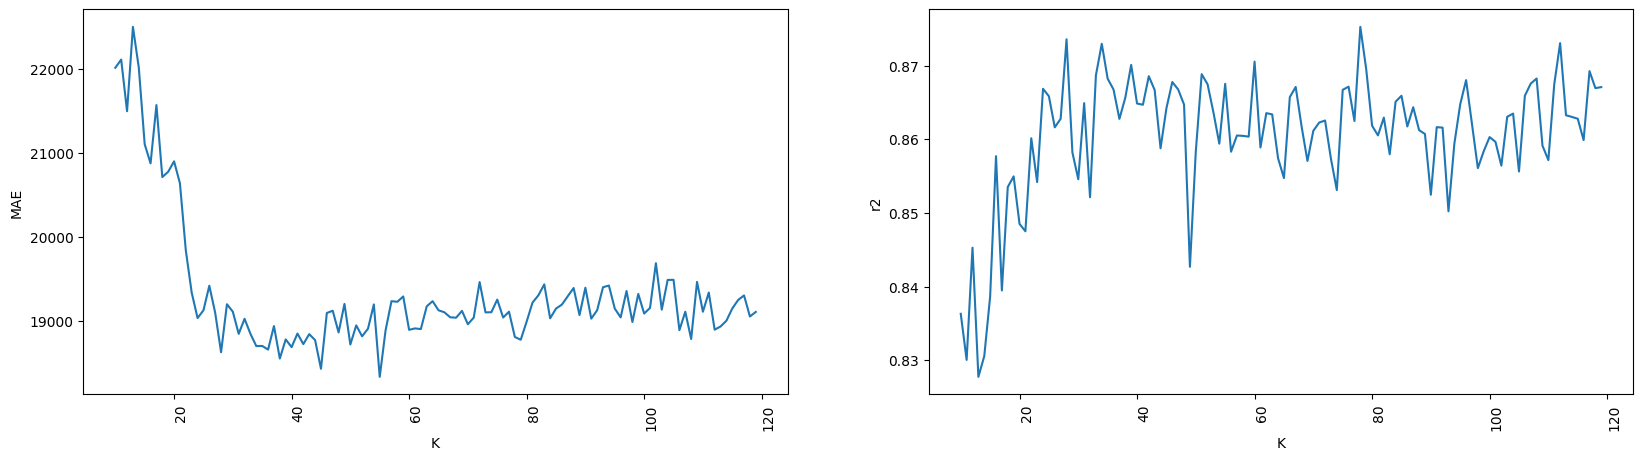

In [10]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [11]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               4.528134e-02
LotFrontage              7.087096e-03
LotArea                  1.397675e-02
OverallQual              1.971269e-02
OverallCond              1.660969e-02
                             ...     
SaleCondition_Family     1.050945e-02
SaleCondition_Normal     1.118082e-01
SaleCondition_Partial    5.743050e-02
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [12]:
varr.loc[varr > 0.1].index

Index(['MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'BldgType_1Fam', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_MetalSd',
       'Exterior1st_VinylSd', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'SaleCondition_Normal', 'SalePrice'],
      dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [13]:
from sklearn.feature_selection import VarianceThreshold

In [14]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'BldgType_1Fam', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_MetalSd',
       'Exterior1st_VinylSd', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'SaleCondition_Normal', 'SalePrice'],
      dtype='object')

In [15]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,19014.211438,31182.604766,0.873232
1,101,18980.634658,32140.911726,0.865320
2,102,18917.841096,31108.473610,0.873834
3,103,18679.546644,30578.776212,0.878094
4,104,19008.828562,31378.754351,0.871632
...,...,...,...,...
395,495,18389.611199,30107.789541,0.881820
396,496,18319.005651,30706.142742,0.877076
397,497,18513.221507,30776.688311,0.876511
398,498,18427.973459,30336.857275,0.880015


In [16]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
159,259,18133.597877,29740.177882,0.884688
98,198,18157.075377,30344.641895,0.879953
287,387,18187.168870,29867.937789,0.883695
173,273,18194.907637,30368.290037,0.879766
280,380,18201.687534,29424.768422,0.887121
...,...,...,...,...
15,115,19189.633870,32037.486423,0.866186
68,168,19191.705377,32004.874888,0.866458
161,261,19209.219726,31116.528394,0.873768
157,257,19213.556267,32350.835635,0.863555


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25544\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25544\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


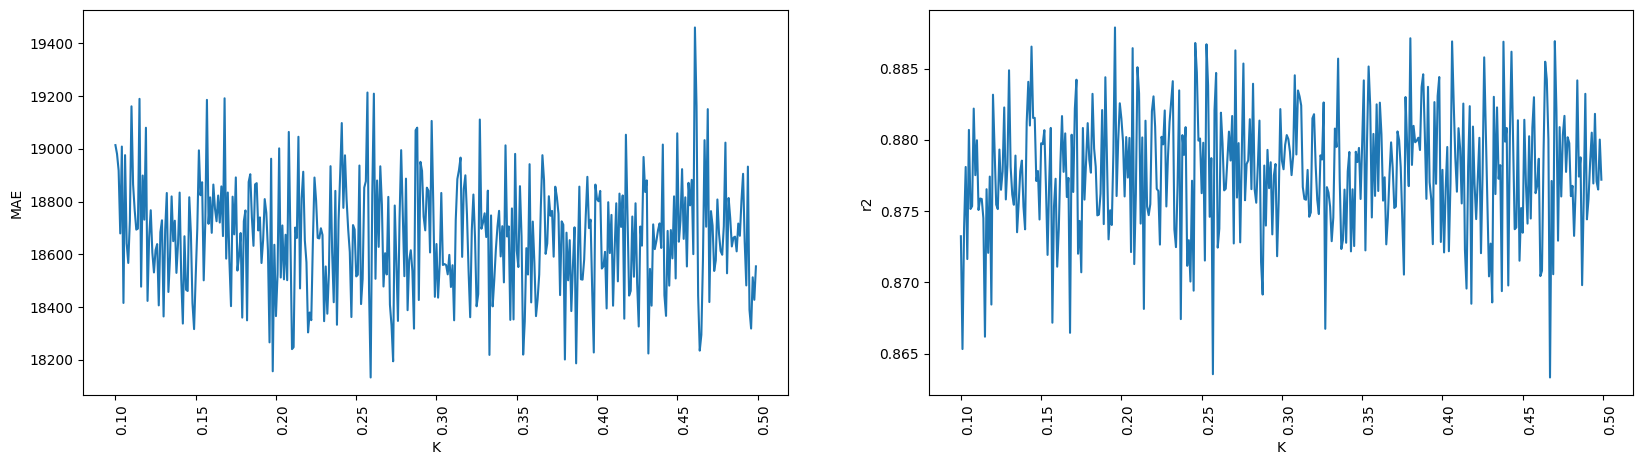

In [17]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


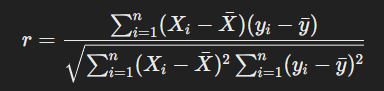

### Using numpy

In [18]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [19]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.5248525198657469


In [20]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25544\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[['GrLivArea', 0.6075721273224743]]

### Using sklearn

In [21]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'BsmtQual_Ex'], dtype=object)

In [22]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


,K,MAE,RMSE,r2
0,5,22691.046096,35535.972163,0.835365
1,6,22467.487432,36571.365078,0.825631
2,7,22144.440411,35750.971764,0.833367
3,8,21884.749212,35650.797243,0.834299
4,9,21576.374486,35468.768334,0.835987
...,...,...,...,...
110,115,19141.016267,31229.485161,0.872850
111,116,19044.171986,32544.020187,0.861921
112,117,18947.229760,32021.032176,0.866323
113,118,19197.129555,32616.904006,0.861302


In [23]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
32,37,18384.624692,31574.289233,0.870027
38,43,18524.665822,30660.032725,0.877445
24,29,18536.806199,31281.945712,0.872423
108,113,18555.736096,31672.673784,0.869216
39,44,18562.540514,31420.733500,0.871288
...,...,...,...,...
2,7,22144.440411,35750.971764,0.833367
8,13,22169.687603,36760.121065,0.823827
7,12,22396.040651,35777.326714,0.833121
1,6,22467.487432,36571.365078,0.825631


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25544\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25544\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


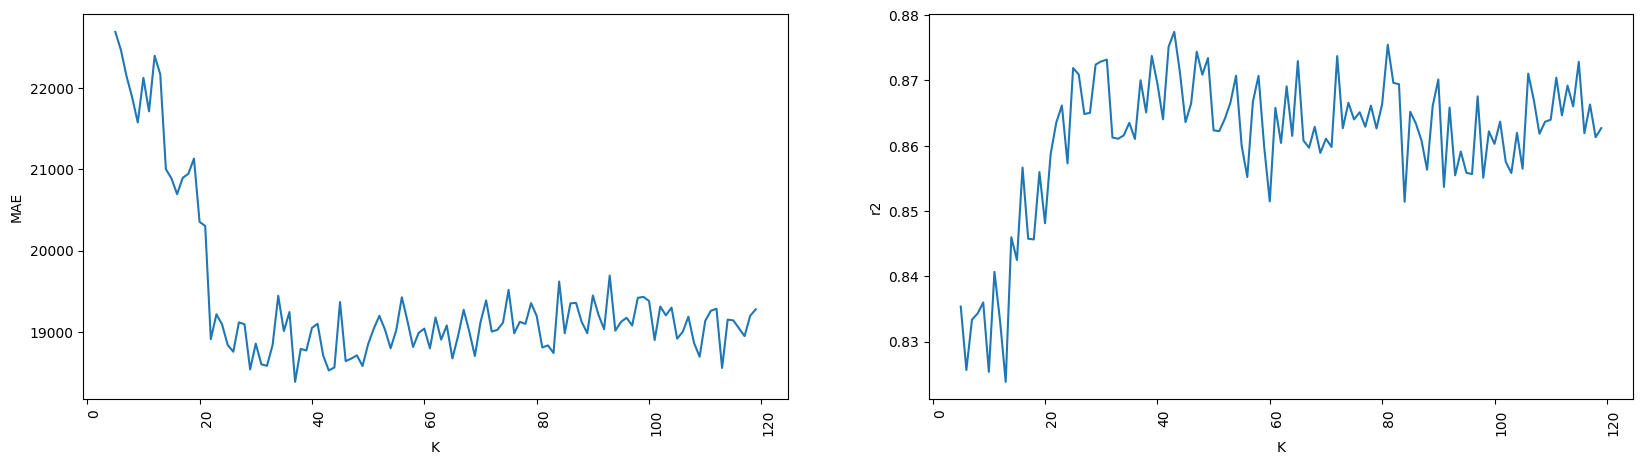

In [24]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

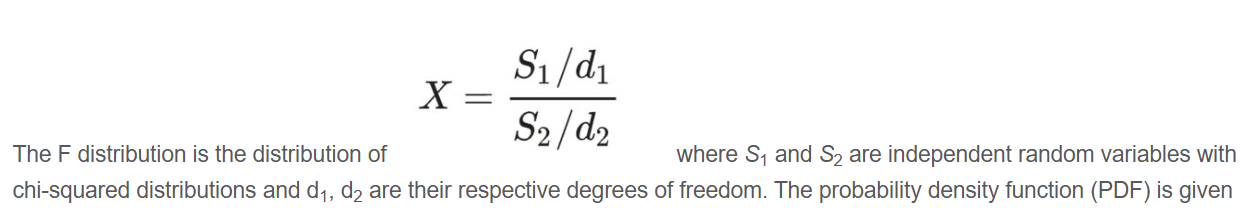

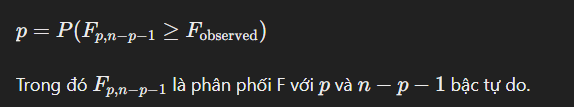

In [25]:
from sklearn.feature_selection import f_regression

In [26]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

,K,MAE,RMSE,r2
0,5,23700.252911,37418.059496,0.817464
1,6,22717.849384,36141.022713,0.829711
2,7,21964.899110,32265.967403,0.864270
3,8,20352.471370,31322.142697,0.872095
4,9,19864.825000,30886.530579,0.875627
...,...,...,...,...
110,115,18168.850308,29400.927569,0.887304
111,116,18686.510171,31037.095503,0.874412
112,117,18308.297192,29435.314075,0.887040
113,118,18547.187877,30429.399339,0.879282


In [27]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
39,44,17528.734726,29134.690451,0.889336
40,45,17879.148253,29064.077037,0.889872
43,48,17889.698014,28771.113890,0.892081
66,71,17911.107877,29089.436222,0.889679
50,55,17939.444521,29129.006273,0.889379
...,...,...,...,...
4,9,19864.825000,30886.530579,0.875627
3,8,20352.471370,31322.142697,0.872095
2,7,21964.899110,32265.967403,0.864270
1,6,22717.849384,36141.022713,0.829711


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25544\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25544\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


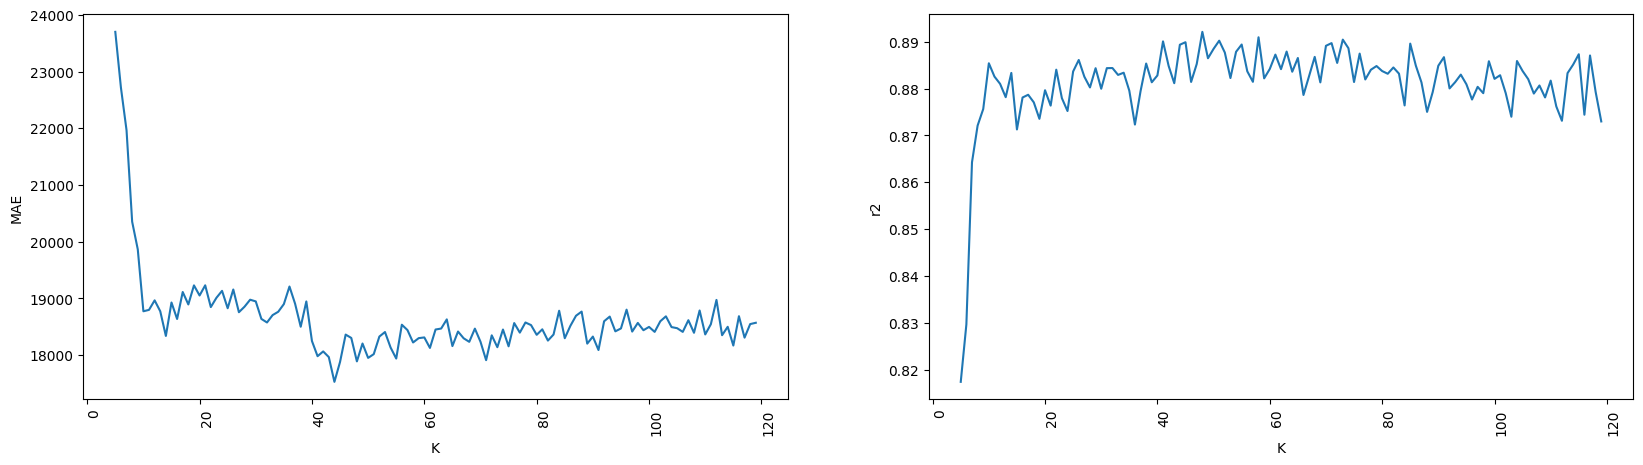

In [28]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

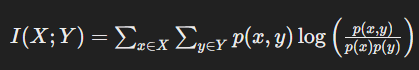

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

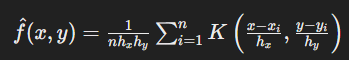

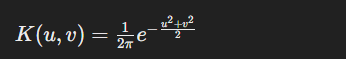

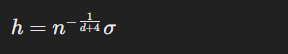

In [29]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [30]:
from sklearn.feature_selection import mutual_info_regression

In [31]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,5,31006.719932,49240.330487,0.683897
1,6,28140.768048,43503.576182,0.753262
2,7,26990.153562,40186.330328,0.789456
3,8,27400.355788,41057.038746,0.780234
4,9,27307.264075,40768.755171,0.783309
...,...,...,...,...
110,115,18723.861164,30711.625119,0.877032
111,116,18833.392295,30696.026065,0.877157
112,117,18768.774760,30469.296939,0.878965
113,118,18697.844692,30836.991048,0.876026


In [32]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [33]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
82,87,18181.050342,29200.058988,0.888839
84,89,18252.917055,29915.084608,0.883328
106,111,18344.194795,29820.943134,0.884061
99,104,18356.150856,29595.259000,0.885809
104,109,18409.193801,30081.143983,0.882029
...,...,...,...,...
5,10,27138.623014,41014.639970,0.780687
4,9,27307.264075,40768.755171,0.783309
3,8,27400.355788,41057.038746,0.780234
1,6,28140.768048,43503.576182,0.753262


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25544\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25544\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


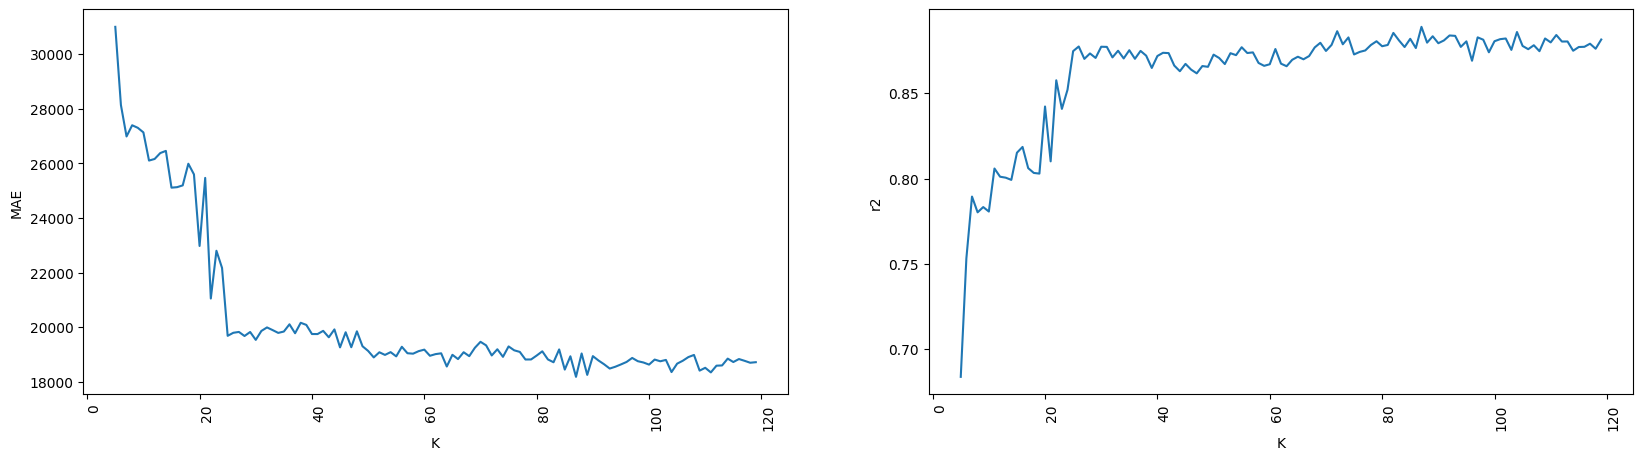

In [34]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [35]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,22691.046096,35535.972163,0.835365
1,6,22467.487432,36571.365078,0.825631
2,7,22144.440411,35750.971764,0.833367
3,8,21884.749212,35650.797243,0.834299
4,9,21576.374486,35468.768334,0.835987
...,...,...,...,...
110,115,19141.016267,31229.485161,0.872850
111,116,19044.171986,32544.020187,0.861921
112,117,18947.229760,32021.032176,0.866323
113,118,19197.129555,32616.904006,0.861302


In [36]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,23700.252911,37418.059496,0.817464
1,6,22717.849384,36141.022713,0.829711
2,7,21964.899110,32265.967403,0.864270
3,8,20352.471370,31322.142697,0.872095
4,9,19864.825000,30886.530579,0.875627
...,...,...,...,...
110,115,18168.850308,29400.927569,0.887304
111,116,18686.510171,31037.095503,0.874412
112,117,18308.297192,29435.314075,0.887040
113,118,18547.187877,30429.399339,0.879282


In [37]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,31006.719932,49240.330487,0.683897
1,6,28140.768048,43503.576182,0.753262
2,7,26990.153562,40186.330328,0.789456
3,8,27400.355788,41057.038746,0.780234
4,9,27307.264075,40768.755171,0.783309
...,...,...,...,...
110,115,18723.861164,30711.625119,0.877032
111,116,18833.392295,30696.026065,0.877157
112,117,18768.774760,30469.296939,0.878965
113,118,18697.844692,30836.991048,0.876026


In [38]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,22691.046096,35535.972163,0.835365,23700.252911,37418.059496,0.817464
1,6,22467.487432,36571.365078,0.825631,22717.849384,36141.022713,0.829711
2,7,22144.440411,35750.971764,0.833367,21964.899110,32265.967403,0.864270
3,8,21884.749212,35650.797243,0.834299,20352.471370,31322.142697,0.872095
4,9,21576.374486,35468.768334,0.835987,19864.825000,30886.530579,0.875627
...,...,...,...,...,...,...,...
110,115,19141.016267,31229.485161,0.872850,18168.850308,29400.927569,0.887304
111,116,19044.171986,32544.020187,0.861921,18686.510171,31037.095503,0.874412
112,117,18947.229760,32021.032176,0.866323,18308.297192,29435.314075,0.887040
113,118,19197.129555,32616.904006,0.861302,18547.187877,30429.399339,0.879282


In [39]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,22691.046096,35535.972163,0.835365,23700.252911,37418.059496,0.817464,31006.719932,49240.330487,0.683897
1,6,22467.487432,36571.365078,0.825631,22717.849384,36141.022713,0.829711,28140.768048,43503.576182,0.753262
2,7,22144.440411,35750.971764,0.833367,21964.899110,32265.967403,0.864270,26990.153562,40186.330328,0.789456
3,8,21884.749212,35650.797243,0.834299,20352.471370,31322.142697,0.872095,27400.355788,41057.038746,0.780234
4,9,21576.374486,35468.768334,0.835987,19864.825000,30886.530579,0.875627,27307.264075,40768.755171,0.783309
...,...,...,...,...,...,...,...,...,...,...
110,115,19141.016267,31229.485161,0.872850,18168.850308,29400.927569,0.887304,18723.861164,30711.625119,0.877032
111,116,19044.171986,32544.020187,0.861921,18686.510171,31037.095503,0.874412,18833.392295,30696.026065,0.877157
112,117,18947.229760,32021.032176,0.866323,18308.297192,29435.314075,0.887040,18768.774760,30469.296939,0.878965
113,118,19197.129555,32616.904006,0.861302,18547.187877,30429.399339,0.879282,18697.844692,30836.991048,0.876026


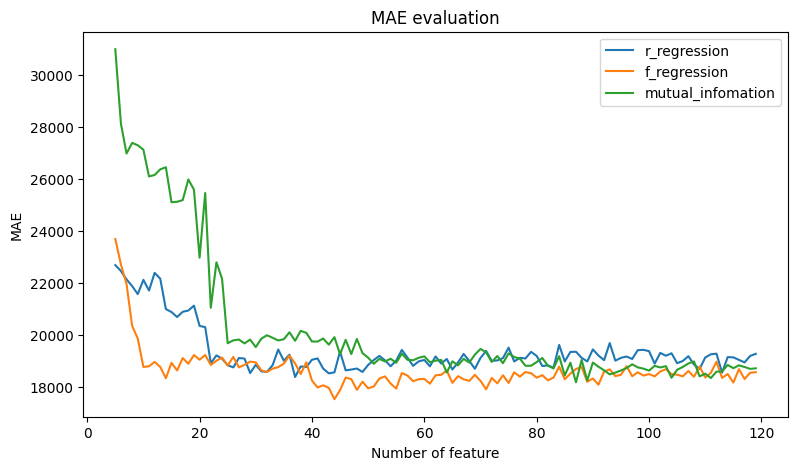

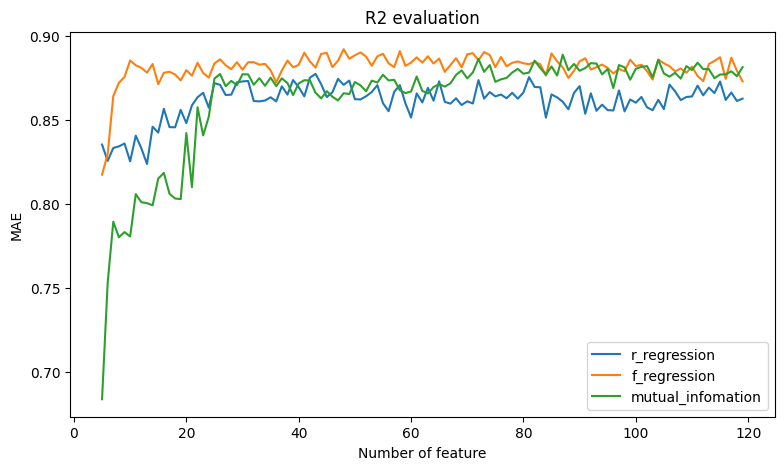

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()